In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Combined Dataset & Data Wrangling

In [ ]:
combined_data_jacob = pd.read_csv("./Data/combined_igdb_vgchartz - combined_igdb_vgchartz.csv", encoding='latin-1')
combined_data_jacob.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'vg_score', 'critic_score', 'user_score', 'total_shipped',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'last_update', 'total_sales_shipped', 'id', 'category',
       'cover', 'created_at', 'external_games', 'first_release_date',
       'game_modes', 'genres', 'name', 'platforms', 'release_dates',
       'screenshots', 'similar_games', 'slug', 'status', 'summary', 'tags',
       'themes', 'updated_at', 'url', 'websites', 'checksum', 'age_ratings',
       'involved_companies', 'alternative_names', 'parent_game',
       'game_engines', 'keywords', 'player_perspectives', 'artworks', 'videos',
       'collection', 'storyline', 'rating', 'rating_count', 'total_rating',
       'total_rating_count', 'version_parent', 'version_title', 'hypes',
       'franchises', 'follows', 'aggregated_rating', 'aggregated_rating_count',
       'multiplayer_modes', 'franchise', 'dlcs

In [ ]:
combined_data_jacob_dropped = combined_data_jacob.drop(['img', 'bundles', 'expanded_games', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales','last_update','cover', 'created_at', 'external_games', 'first_release_date','name','release_dates',
       'screenshots', 'similar_games', 'slug','updated_at', 'url', 'websites', 'checksum','involved_companies', 'alternative_names', 'parent_game','artworks', 'videos','version_parent', 'version_title','follows','ports','forks',
       'expansions', 'remakes', 'total_shipped', 'tags', 'multiplayer_modes', 'id', 'storyline', 'dlcs', 'standalone_expansions', 'remasters'], axis=1)
combined_data_jacob_dropped = combined_data_jacob_dropped[combined_data_jacob_dropped['release_date']>'2007-01-01']

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
combined_data_jacob_dropped[['vg_score', 'critic_score', 'user_score', 'status', 'collection', 'rating', 'rating_count', 'total_rating', 'total_rating_count', 'aggregated_rating', 'aggregated_rating_count','total_sales_shipped','hypes','franchise']] = combined_data_jacob_dropped[['vg_score', 'critic_score', 'user_score', 'status', 'collection', 'rating', 'rating_count', 'total_rating', 'total_rating_count', 'aggregated_rating', 'aggregated_rating_count','total_sales_shipped','hypes','franchise']].fillna(0)
combined_data_jacob_dropped[['game_modes', 'genres', 'platforms', 'age_ratings', 'themes', 'player_perspectives','game_engines', 'keywords']] = combined_data_jacob_dropped[['game_modes', 'genres', 'platforms', 'age_ratings', 'themes', 'player_perspectives','game_engines', 'keywords']].fillna('[]')
combined_data_jacob_dropped['franchises'] = combined_data_jacob_dropped['franchises'].isnull().astype(int)
combined_data_jacob_dropped = combined_data_jacob_dropped[combined_data_jacob_dropped['release_date']>'2007-01-01'].reset_index()
combined_data_jacob_dropped

,index,title,console,genre,publisher,developer,vg_score,critic_score,user_score,release_date,total_sales_shipped,category,game_modes,genres,platforms,status,summary,themes,age_ratings,game_engines,keywords,player_perspectives,collection,rating,rating_count,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,franchise
0,1781,WarioWare: Smooth Moves,Wii,Puzzle,Nintendo,Intelligent Systems,8.1,8.2,0.0,2007-01-15,2.35,0,"[1, 2, 4]",[9],"[5, 41]",0.0,"Wario and his pals learn fun, wacky moves afte...","[1, 27, 40]","[211, 50844, 50845, 50846, 50847]",[],"[3, 274, 350, 403, 758, 1299, 1699, 1935, 2152...","[1, 2, 4]",1113.0,86.193063,55.0,83.096531,57.0,0.0,0,80.0,2.0,24.0
1,1782,World of Warcraft: The Burning Crusade,PC,MMO,Blizzard Entertainment,Blizzard Entertainment,0.0,9.2,0.0,2007-01-16,3.50,2,[5],[12],"[6, 14]",0.0,"World of Warcraft: The Burning Crusade, the fi...",[17],"[1049, 45013]",[],"[16, 72, 96, 129, 159, 170, 221, 226, 227, 236...",[2],27.0,91.501369,215.0,83.250685,219.0,0.0,0,75.0,4.0,135.0
2,1783,Dragon Shadow Spell,PS2,Role-Playing,Flight-Plan,Flight-Plan,0.0,0.0,0.0,2007-01-18,0.08,0,[],"[12, 15, 16]",[8],0.0,Dragon Shadow Spell is a strategy RPG game.,[],[],[],[],[],0.0,0.000000,0.0,0.000000,0.0,0.0,1,0.0,0.0,0.0
3,1784,Hotel Dusk: Room 215,DS,Adventure,Nintendo,Cing,0.0,8.0,6.9,2007-01-22,0.54,0,[1],"[2, 9, 31, 34]",[20],0.0,Take control of an interactive mystery novel a...,[43],"[6318, 34483]",[],"[16, 72, 197, 215, 274, 284, 760, 966, 1027, 1...","[1, 3, 5]",5345.0,83.467144,49.0,81.733572,51.0,0.0,1,80.0,2.0,0.0
4,1785,Europa Universalis III,PC,Strategy,Paradox Interactive,Paradox Interactive,0.0,0.0,0.0,2007-01-23,0.01,0,"[1, 2]","[11, 15]","[6, 14]",0.0,Europa Universalis III delves deeply into the ...,[22],[18443],[296],"[149, 3782, 5498]",[3],165.0,84.010827,34.0,77.005413,35.0,0.0,1,70.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,4209,Monark,All,Role-Playing,FuRyu Corporation,Lancarse,0.0,0.0,0.0,2022-02-22,0.05,0,[1],"[12, 15, 16, 31]","[6, 48, 130, 167]",0.0,"Monark, the ânew school RPGâ from former M...",[17],"[57448, 57506]",[],[1270],[2],0.0,0.000000,0.0,80.000000,2.0,2.0,1,80.0,2.0,0.0
2429,4210,Elden Ring,All,Action-Adventure,Bandai Namco Entertainment,From Software,0.0,0.0,0.0,2022-02-25,12.00,0,"[1, 2, 3]",[12],"[6, 48, 49, 167, 169]",0.0,"Elden Ring is a fantasy, action and open world...",[1],"[57164, 57165, 57166, 57167, 57168, 57169, 57170]",[],[17326],[2],0.0,95.833014,79.0,96.366507,92.0,93.0,1,96.9,13.0,0.0
2430,4211,Triangle Strategy,NS,Role-Playing,Nintendo,Square Enix,7.5,0.0,0.0,2022-03-04,0.80,0,[1],"[12, 15, 24, 31]",[130],0.0,Three nations battle for control of the dwindl...,[17],"[49892, 50722, 56781]",[],[],[3],0.0,0.000000,0.0,83.000000,9.0,5.0,1,83.0,9.0,0.0
2431,4212,Core Keeper,PC,Adventure,Fireshine Games,Pugstorm Game Studios,0.0,0.0,0.0,2022-03-08,0.50,0,"[1, 2, 3]","[12, 31, 32]","[3, 6]",4.0,"Explore an endless cavern of creatures, relics...","[21, 33, 43]",[],[],"[72, 101, 288, 510, 577, 758, 1403, 1697, 1780...",[3],0.0,0.000000,0.0,0.000000,0.0,2.0,1,0.0,0.0,0.0


In [ ]:
combined_data_jacob_aggregated = combined_data_jacob_dropped
combined_data_jacob_aggregated['log2'] = combined_data_jacob_aggregated['total_sales_shipped'].apply(lambda x: math.log2(x+1))
combined_data_jacob_aggregated = combined_data_jacob_aggregated.drop(['total_sales_shipped'], axis=1)
combined_data_jacob_aggregated = combined_data_jacob_aggregated.drop(['index'], axis=1)

combined_data_jacob_aggregated['year'] = combined_data_jacob_aggregated['release_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").year)
combined_data_jacob_aggregated['month'] = combined_data_jacob_aggregated['release_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").month)
combined_data_jacob_aggregated['day'] = combined_data_jacob_aggregated['release_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").day)

In [ ]:
combined_data_jacob_cleaned = combined_data_jacob_aggregated.drop(['release_date', 'genre', 'summary', 'console', 'keywords', 'rating_count'], axis=1)
combined_data_jacob_cleaned

,title,publisher,developer,vg_score,critic_score,user_score,category,game_modes,genres,platforms,status,themes,age_ratings,game_engines,player_perspectives,collection,rating,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,franchise,log2,year,month,day
0,WarioWare: Smooth Moves,Nintendo,Intelligent Systems,8.1,8.2,0.0,0,"[1, 2, 4]",[9],"[5, 41]",0.0,"[1, 27, 40]","[211, 50844, 50845, 50846, 50847]",[],"[1, 2, 4]",1113.0,86.193063,83.096531,57.0,0.0,0,80.0,2.0,24.0,1.744161,2007,1,15
1,World of Warcraft: The Burning Crusade,Blizzard Entertainment,Blizzard Entertainment,0.0,9.2,0.0,2,[5],[12],"[6, 14]",0.0,[17],"[1049, 45013]",[],[2],27.0,91.501369,83.250685,219.0,0.0,0,75.0,4.0,135.0,2.169925,2007,1,16
2,Dragon Shadow Spell,Flight-Plan,Flight-Plan,0.0,0.0,0.0,0,[],"[12, 15, 16]",[8],0.0,[],[],[],[],0.0,0.000000,0.000000,0.0,0.0,1,0.0,0.0,0.0,0.111031,2007,1,18
3,Hotel Dusk: Room 215,Nintendo,Cing,0.0,8.0,6.9,0,[1],"[2, 9, 31, 34]",[20],0.0,[43],"[6318, 34483]",[],"[1, 3, 5]",5345.0,83.467144,81.733572,51.0,0.0,1,80.0,2.0,0.0,0.622930,2007,1,22
4,Europa Universalis III,Paradox Interactive,Paradox Interactive,0.0,0.0,0.0,0,"[1, 2]","[11, 15]","[6, 14]",0.0,[22],[18443],[296],[3],165.0,84.010827,77.005413,35.0,0.0,1,70.0,1.0,0.0,0.014355,2007,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,Monark,FuRyu Corporation,Lancarse,0.0,0.0,0.0,0,[1],"[12, 15, 16, 31]","[6, 48, 130, 167]",0.0,[17],"[57448, 57506]",[],[2],0.0,0.000000,80.000000,2.0,2.0,1,80.0,2.0,0.0,0.070389,2022,2,22
2429,Elden Ring,Bandai Namco Entertainment,From Software,0.0,0.0,0.0,0,"[1, 2, 3]",[12],"[6, 48, 49, 167, 169]",0.0,[1],"[57164, 57165, 57166, 57167, 57168, 57169, 57170]",[],[2],0.0,95.833014,96.366507,92.0,93.0,1,96.9,13.0,0.0,3.700440,2022,2,25
2430,Triangle Strategy,Nintendo,Square Enix,7.5,0.0,0.0,0,[1],"[12, 15, 24, 31]",[130],0.0,[17],"[49892, 50722, 56781]",[],[3],0.0,0.000000,83.000000,9.0,5.0,1,83.0,9.0,0.0,0.847997,2022,3,4
2431,Core Keeper,Fireshine Games,Pugstorm Game Studios,0.0,0.0,0.0,0,"[1, 2, 3]","[12, 31, 32]","[3, 6]",4.0,"[21, 33, 43]",[],[],[3],0.0,0.000000,0.000000,0.0,2.0,1,0.0,0.0,0.0,0.584963,2022,3,8


In [ ]:
def getList(df, col):
  return df[col].str.strip('[]').str.split(', ').to_list()

def getUnion(df, col):
  list_form = getList(df, col)
  set_form = set()

  for i in range(len(list_form)):
    for j in range(len(list_form[i])):
      set_form.add(list_form[i][j])
  return list(set_form)

def flatten(df, col):
  entry_list = getList(df, col)
  entry_union = getUnion(df, col)

  for item in entry_union:
    df[col+" "+item] = np.zeros(df.shape[0])

  for i in range(len(entry_list)):
    for j in range(len(entry_union)):
     if entry_union[j] in entry_list[i]:
        df.at[i, col+" "+entry_union[j]] = 1

In [ ]:
combined_data_jacob_cleaned

,title,publisher,developer,vg_score,critic_score,user_score,category,game_modes,genres,platforms,status,themes,age_ratings,game_engines,player_perspectives,collection,rating,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,franchise,log2,year,month,day
0,WarioWare: Smooth Moves,Nintendo,Intelligent Systems,8.1,8.2,0.0,0,"[1, 2, 4]",[9],"[5, 41]",0.0,"[1, 27, 40]","[211, 50844, 50845, 50846, 50847]",[],"[1, 2, 4]",1113.0,86.193063,83.096531,57.0,0.0,0,80.0,2.0,24.0,1.744161,2007,1,15
1,World of Warcraft: The Burning Crusade,Blizzard Entertainment,Blizzard Entertainment,0.0,9.2,0.0,2,[5],[12],"[6, 14]",0.0,[17],"[1049, 45013]",[],[2],27.0,91.501369,83.250685,219.0,0.0,0,75.0,4.0,135.0,2.169925,2007,1,16
2,Dragon Shadow Spell,Flight-Plan,Flight-Plan,0.0,0.0,0.0,0,[],"[12, 15, 16]",[8],0.0,[],[],[],[],0.0,0.000000,0.000000,0.0,0.0,1,0.0,0.0,0.0,0.111031,2007,1,18
3,Hotel Dusk: Room 215,Nintendo,Cing,0.0,8.0,6.9,0,[1],"[2, 9, 31, 34]",[20],0.0,[43],"[6318, 34483]",[],"[1, 3, 5]",5345.0,83.467144,81.733572,51.0,0.0,1,80.0,2.0,0.0,0.622930,2007,1,22
4,Europa Universalis III,Paradox Interactive,Paradox Interactive,0.0,0.0,0.0,0,"[1, 2]","[11, 15]","[6, 14]",0.0,[22],[18443],[296],[3],165.0,84.010827,77.005413,35.0,0.0,1,70.0,1.0,0.0,0.014355,2007,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,Monark,FuRyu Corporation,Lancarse,0.0,0.0,0.0,0,[1],"[12, 15, 16, 31]","[6, 48, 130, 167]",0.0,[17],"[57448, 57506]",[],[2],0.0,0.000000,80.000000,2.0,2.0,1,80.0,2.0,0.0,0.070389,2022,2,22
2429,Elden Ring,Bandai Namco Entertainment,From Software,0.0,0.0,0.0,0,"[1, 2, 3]",[12],"[6, 48, 49, 167, 169]",0.0,[1],"[57164, 57165, 57166, 57167, 57168, 57169, 57170]",[],[2],0.0,95.833014,96.366507,92.0,93.0,1,96.9,13.0,0.0,3.700440,2022,2,25
2430,Triangle Strategy,Nintendo,Square Enix,7.5,0.0,0.0,0,[1],"[12, 15, 24, 31]",[130],0.0,[17],"[49892, 50722, 56781]",[],[3],0.0,0.000000,83.000000,9.0,5.0,1,83.0,9.0,0.0,0.847997,2022,3,4
2431,Core Keeper,Fireshine Games,Pugstorm Game Studios,0.0,0.0,0.0,0,"[1, 2, 3]","[12, 31, 32]","[3, 6]",4.0,"[21, 33, 43]",[],[],[3],0.0,0.000000,0.000000,0.0,2.0,1,0.0,0.0,0.0,0.584963,2022,3,8


In [ ]:
to_flatten = ['genres', 'platforms', 'game_modes', 'player_perspectives', 'themes', 'game_engines']
for col in to_flatten:
  flatten(combined_data_jacob_cleaned, col)

combined_data_jacob_cleaned = combined_data_jacob_cleaned.drop(to_flatten, axis = 1)
combined_data_jacob_cleaned

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


,title,publisher,developer,vg_score,critic_score,user_score,category,status,age_ratings,collection,rating,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,franchise,log2,year,month,day,genres 24,genres 35,genres 11,genres 14,genres 25,genres 2,genres 8,genres 4,genres 36,genres 32,genres 33,genres 30,genres 12,genres 7,genres 5,genres 26,genres 13,genres 34,genres 16,genres 10,genres 31,genres 15,genres 9,platforms 48,platforms 86,platforms 24,platforms 35,platforms 14,platforms 11,platforms 159,platforms 49,platforms 25,platforms 19,platforms 8,platforms 44,platforms 55,platforms 29,platforms 32,platforms 121,platforms 385,platforms 384,platforms 52,platforms 170,platforms 42,platforms 167,platforms 23,platforms 3,platforms 74,platforms 240,platforms 137,platforms 165,platforms 41,platforms 163,platforms 64,platforms 12,platforms 161,platforms 38,platforms 130,platforms 5,platforms 26,platforms 72,platforms 46,platforms 7,platforms 169,platforms 94,platforms 34,platforms 13,platforms 386,platforms 113,platforms 16,platforms 63,platforms 73,platforms 58,platforms 20,platforms 132,platforms 6,platforms 21,platforms 39,platforms 37,platforms 93,platforms 18,platforms 15,platforms 82,platforms 9,game_modes,game_modes 4,game_modes 3,game_modes 6,game_modes 5,game_modes 2,game_modes 1,player_perspectives,player_perspectives 4,player_perspectives 3,player_perspectives 7,player_perspectives 6,player_perspectives 5,player_perspectives 2,player_perspectives 1,themes,themes 43,themes 35,themes 27,themes 1,themes 40,themes 19,themes 44,themes 32,themes 33,themes 17,themes 42,themes 23,themes 28,themes 41,themes 38,themes 34,themes 20,themes 31,themes 39,themes 21,themes 22,themes 18,game_engines,game_engines 1309,game_engines 321,game_engines 84,game_engines 48,game_engines 280,game_engines 35,game_engines 214,game_engines 25,game_engines 1230,game_engines 490,game_engines 19,game_engines 135,game_engines 75,game_engines 436,game_engines 362,game_engines 1045,game_engines 233,game_engines 412,game_engines 761,game_engines 42,game_engines 695,game_engines 3,game_engines 513,game_engines 212,game_engines 576,game_engines 89,game_engines 46,game_engines 13,game_engines 278,game_engines 391,game_engines 437,game_engines 73,game_engines 1036,game_engines 618,game_engines 458,game_engines 418,game_engines 22,game_engines 760,game_engines 76,game_engines 123,game_engines 9,game_engines 404,game_engines 279,game_engines 347,game_engines 970,game_engines 179,game_engines 126,game_engines 465,game_engines 207,game_engines 971,game_engines 820,game_engines 173,game_engines 502,game_engines 265,game_engines 225,game_engines 818,game_engines 684,game_engines 466,game_engines 55,game_engines 400,game_engines 601,game_engines 406,game_engines 326,game_engines 118,game_engines 567,game_engines 272,game_engines 240,game_engines 105,game_engines 1108,game_engines 38,game_engines 130,game_engines 7,game_engines 1011,game_engines 386,game_engines 10,game_engines 60,game_engines 310,game_engines 18,game_engines 183,game_engines 752,game_engines 497,game_engines 65,game_engines 487,game_engines 1115,game_engines 153,game_engines 259,game_engines 319,game_engines 79,game_engines 515,game_engines 24,game_engines 50,game_engines 768,game_engines 354,game_engines 95,game_engines 216,game_engines 2,game_engines 119,game_engines 235,game_engines 486,game_engines 8,game_engines 341,game_engines 36,game_engines 1113,game_engines 668,game_engines 277,game_engines 296,game_engines 52,game_engines 170,game_engines 17,game_engines 209,game_engines 610,game_engines 237,game_engines 120,game_engines 78,game_engines 192,game_engines 41,game_engines 150,game_engines 68,game_engines 12,game_engines 350,game_engines 439,game_engines 325,game_engines 1149,game_engines 21,game_engines 31,game_engines 528,game_engines 476,game_engines 337,game_engines 677,game_engines 491,game_engines 234,game_engines 114,game_engines 54,game_engines 174,

In [ ]:
age_ratings = pd.read_csv("./Data/igdb_age_ratings.csv")

rating = []
ind = 0
for i in combined_data_jacob_cleaned['age_ratings']:
    ind += 1
    if i == '[]':
        rating.append(-1)
    elif type(eval(i)) == int:
        rating.append(-1)
    elif i == '[32227]':
        rating.append(-1)
    else:
        found = False
        for j in eval(i):
            if age_ratings.query(f'id=={j}')['category'].empty == False and int(age_ratings.query(f'id=={j}')['category']) == 1:
                rating.append(int(age_ratings.query(f'id=={j}')['rating']))
                found = True
                break
        if found == False:
            for j in eval(i):
                if not age_ratings.query(f'id=={j}')['category'].empty:
                    # print('hit')
                    rating.append(int(age_ratings.query(f'id=={j}')['rating']))
                    break

combined_data_jacob_cleaned['age_ratings'] = rating
combined_data_jacob_cleaned['age_ratings']

0        9
1       10
2       -1
3       10
4        8
        ..
2428    10
2429    11
2430    10
2431    -1
2432    -1
Name: age_ratings, Length: 2433, dtype: int64

## New Encoding of Categorical Variables

In [ ]:
!pip install dirty_cat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.6 MB/s 


In [ ]:
from dirty_cat import SimilarityEncoder, TargetEncoder, MinHashEncoder, GapEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [ ]:
combined_data_jacob_cleaned

,title,publisher,developer,vg_score,critic_score,user_score,category,status,age_ratings,collection,rating,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,franchise,log2,year,month,day,genres 24,genres 35,genres 11,genres 14,genres 25,genres 2,genres 8,genres 4,genres 36,genres 32,genres 33,genres 30,genres 12,genres 7,genres 5,genres 26,genres 13,genres 34,genres 16,genres 10,genres 31,genres 15,genres 9,platforms 48,platforms 86,platforms 24,platforms 35,platforms 14,platforms 11,platforms 159,platforms 49,platforms 25,platforms 19,platforms 8,platforms 44,platforms 55,platforms 29,platforms 32,platforms 121,platforms 385,platforms 384,platforms 52,platforms 170,platforms 42,platforms 167,platforms 23,platforms 3,platforms 74,platforms 240,platforms 137,platforms 165,platforms 41,platforms 163,platforms 64,platforms 12,platforms 161,platforms 38,platforms 130,platforms 5,platforms 26,platforms 72,platforms 46,platforms 7,platforms 169,platforms 94,platforms 34,platforms 13,platforms 386,platforms 113,platforms 16,platforms 63,platforms 73,platforms 58,platforms 20,platforms 132,platforms 6,platforms 21,platforms 39,platforms 37,platforms 93,platforms 18,platforms 15,platforms 82,platforms 9,game_modes,game_modes 4,game_modes 3,game_modes 6,game_modes 5,game_modes 2,game_modes 1,player_perspectives,player_perspectives 4,player_perspectives 3,player_perspectives 7,player_perspectives 6,player_perspectives 5,player_perspectives 2,player_perspectives 1,themes,themes 43,themes 35,themes 27,themes 1,themes 40,themes 19,themes 44,themes 32,themes 33,themes 17,themes 42,themes 23,themes 28,themes 41,themes 38,themes 34,themes 20,themes 31,themes 39,themes 21,themes 22,themes 18,game_engines,game_engines 1309,game_engines 321,game_engines 84,game_engines 48,game_engines 280,game_engines 35,game_engines 214,game_engines 25,game_engines 1230,game_engines 490,game_engines 19,game_engines 135,game_engines 75,game_engines 436,game_engines 362,game_engines 1045,game_engines 233,game_engines 412,game_engines 761,game_engines 42,game_engines 695,game_engines 3,game_engines 513,game_engines 212,game_engines 576,game_engines 89,game_engines 46,game_engines 13,game_engines 278,game_engines 391,game_engines 437,game_engines 73,game_engines 1036,game_engines 618,game_engines 458,game_engines 418,game_engines 22,game_engines 760,game_engines 76,game_engines 123,game_engines 9,game_engines 404,game_engines 279,game_engines 347,game_engines 970,game_engines 179,game_engines 126,game_engines 465,game_engines 207,game_engines 971,game_engines 820,game_engines 173,game_engines 502,game_engines 265,game_engines 225,game_engines 818,game_engines 684,game_engines 466,game_engines 55,game_engines 400,game_engines 601,game_engines 406,game_engines 326,game_engines 118,game_engines 567,game_engines 272,game_engines 240,game_engines 105,game_engines 1108,game_engines 38,game_engines 130,game_engines 7,game_engines 1011,game_engines 386,game_engines 10,game_engines 60,game_engines 310,game_engines 18,game_engines 183,game_engines 752,game_engines 497,game_engines 65,game_engines 487,game_engines 1115,game_engines 153,game_engines 259,game_engines 319,game_engines 79,game_engines 515,game_engines 24,game_engines 50,game_engines 768,game_engines 354,game_engines 95,game_engines 216,game_engines 2,game_engines 119,game_engines 235,game_engines 486,game_engines 8,game_engines 341,game_engines 36,game_engines 1113,game_engines 668,game_engines 277,game_engines 296,game_engines 52,game_engines 170,game_engines 17,game_engines 209,game_engines 610,game_engines 237,game_engines 120,game_engines 78,game_engines 192,game_engines 41,game_engines 150,game_engines 68,game_engines 12,game_engines 350,game_engines 439,game_engines 325,game_engines 1149,game_engines 21,game_engines 31,game_engines 528,game_engines 476,game_engines 337,game_engines 677,game_engines 491,game_engines 234,game_engines 114,game_engines 54,game_engines 174,

In [ ]:
import pickle
pickle.dump(combined_data_jacob_cleaned, open("./Data/data.pkl", "wb"))

In [ ]:
X = combined_data_jacob_cleaned.drop(['log2'], axis=1)
y = combined_data_jacob_cleaned['log2']

In [ ]:
from sklearn.metrics import mean_absolute_error, make_scorer

mae_scorer = make_scorer(mean_absolute_error)

## Testing with Random Forest Regressor

In [ ]:
from dirty_cat import SuperVectorizer
sup_vec = SuperVectorizer(auto_cast=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train_enc = sup_vec.fit_transform(X_train, y_train)
X_test_enc = sup_vec.transform(X_test)

In [ ]:
feature_names = sup_vec.get_feature_names()
feature_names[:8]

['warhammer, assault, grave',
 'warfare, dreams, wireway',
 'collection, connection, detective',
 'guitar, metroid, sturmovik',
 'together, hellbound, outdoor',
 'sports, episode, party',
 'football, ultimate, fallout',
 'worlds, worldwide, madworld']

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train_enc, y_train)

RandomForestRegressor()

In [ ]:
regressor.score(X_test_enc, y_test)

0.6439608805520292

In [ ]:
X_enc = sup_vec.fit_transform(X, y)

In [ ]:
X.shape

(2433, 312)

In [ ]:
np.mean(cross_val_score(regressor, X_enc, y, scoring = mae_scorer, cv=4))

0.39177358636662907

In [ ]:
importances = regressor.feature_importances_
std = np.std(
    [
        tree.feature_importances_
        for tree in regressor.estimators_
    ],
    axis=0
)
indices = np.argsort(importances)
# Sort from least to most
indices = list(reversed(indices))

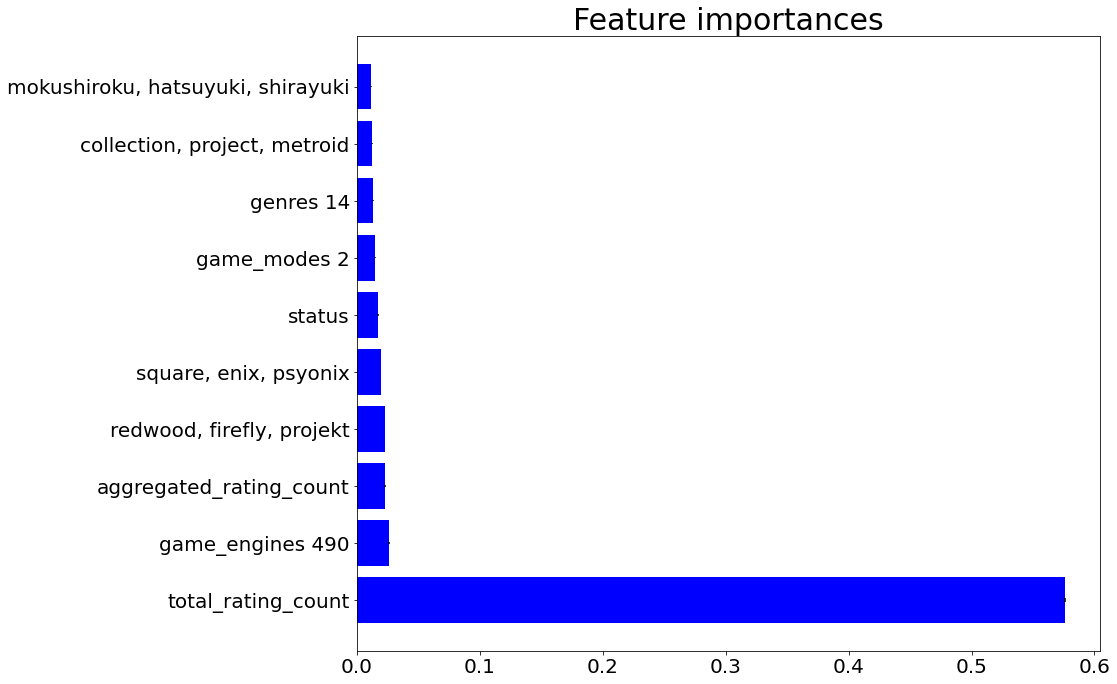

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})
plt.figure(figsize=(16, 10))
plt.rc('xtick', labelsize=20)

plt.title("Feature importances")
n = 10
n_indices = indices[:n]
labels = np.array(feature_names)[n_indices]
plt.barh(range(n), importances[n_indices], color="b", yerr=std[n_indices])
plt.yticks(range(n), labels, size=20)
plt.tight_layout(pad=1)
plt.show()

## Testing with Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GB_regr = GradientBoostingRegressor(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train_enc = sup_vec.fit_transform(X_train, y_train)
X_test_enc = sup_vec.transform(X_test)

In [ ]:
GB_regr.fit(X_train_enc, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
import pickle

In [ ]:
pickle.dump(GB_regr, open("./Data/GB_regr.pkl", "wb"))

In [ ]:
pickle.dump(sup_vec, open("./Data/vectorizer.pkl", "wb"))

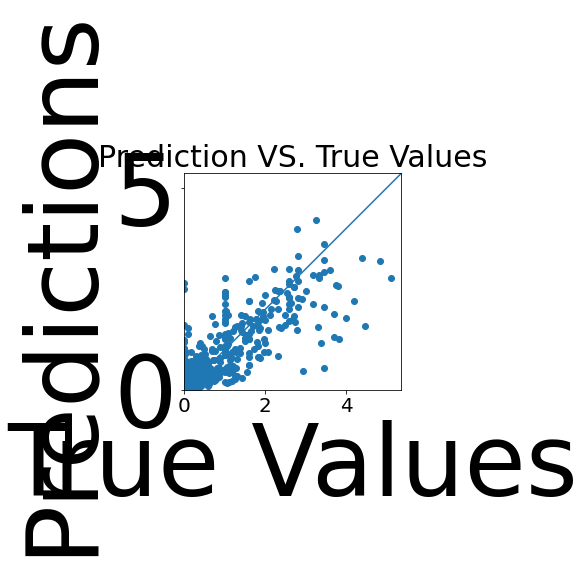

In [ ]:
test_predictions = GB_regr.predict(X_test_enc).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.title("Prediction VS. True Values")
_ = plt.plot([-100, 100], [-100, 100])

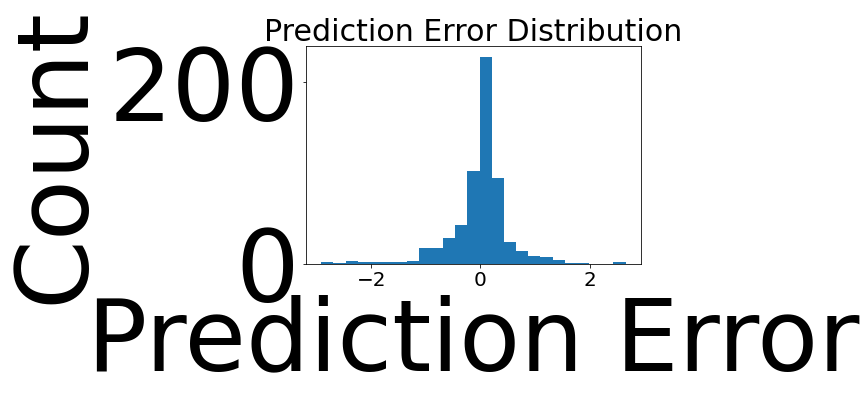

In [ ]:
plt.hist(test_predictions - y_test, bins=25)
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()

In [ ]:
np.mean(cross_val_score(GB_regr, X_enc, y, scoring = mae_scorer, cv=4))

0.39198053219164125

In [ ]:
(2**0.3863  - 1) *  1.495072 * 60

27.54254676590617

In [ ]:
importances = GB_regr.feature_importances_
indices = np.argsort(importances)
# Sort from least to most
indices = list(reversed(indices))

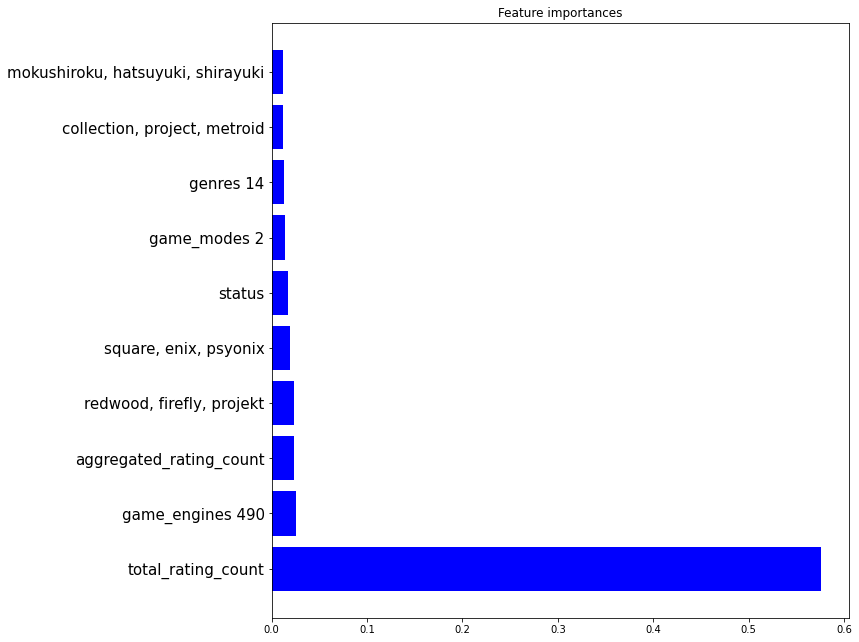

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Feature importances")
n = 10
n_indices = indices[:n]
labels = np.array(feature_names)[n_indices]
plt.barh(range(n), importances[n_indices], color="b")
plt.yticks(range(n), labels, size=15)
plt.tight_layout(pad=1)
plt.show()

# Loading in Reddit Data

In [ ]:
reddit_data = pd.read_csv("./Data/reddit_comments_sample.csv", encoding="ISO-8859-1")[['game_name', 'body']]
reddit_data = reddit_data.dropna()
reddit_data

,body,game_name
0,"In a way, I'm happy people still give them awa...",Minecraft
1,"she was made by those who mine, and the miners...",Minecraft
2,"I've also seen Armin, Tiesto, Cosmic Gate, Bla...",Minecraft
3,\n[Done!](http://getsatisfaction.com/mojang/to...,Minecraft
4,Yes I do the exact same thing. Heres my [hole]...,Minecraft
...,...,...
795,Are you comfortable with revealing more about ...,Elden Ring
796,"Wow, hadn't even noticed the similarities! Gue...",Elden Ring
797,Thanks!,Elden Ring
798,Cool you stole the comment from /r/games and p...,Elden Ring


In [ ]:
def get_comments(data, name_col, token_col):
  comments = dict()
  for index, row in data.iterrows():
    name = row[name_col]
    if name not in comments.keys():
      comments[name] = []
    s = row[token_col]
    if s != "[deleted]" and "http" not in s:
      comments[name].append(str(s))
  return comments

reddit_comments = get_comments(reddit_data, "game_name", "body")

In [ ]:
reddit_comments["Minecraft"][:10]

["In a way, I'm happy people still give them away. There's still some innocence when jerkoffs like this guy exist.",
 'she was made by those who mine, and the miners keep her!',
 "I've also seen Armin, Tiesto, Cosmic Gate, Blank and jones, Ferry Corsten(three times), Freddie le Grande, Deadmau5, Filo and Pero, and a few more. &lt;3",
 "I think it has a lot to do with the fact that I play on Hard.  If I die and I have to walk for 8 in-game days to my project, well - let's just say I won't be finding my diamond picks.\n\nMovable spawn points at a high cost would fix this, I think.  Since either way, we're playing close to our spawn points, might as well let us explore a bit.\n\nAnd nether, minecarts, and boats just aren't enough to relieve this pressure.",
 'Yes, so stop posting codes in plaintext!\n\nWhy on Earth people want to gift extra licenses to cheaters and trolls is beyond me.  Do something creative to gift randomly, or gift to people who are deserving and skint!',
 'At this poin

# Building Word2Vec Model from the Reddit Comments

In [ ]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

import nltk
import gensim
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")


In [ ]:
from nltk.data import find
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

LookupError: ignored

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [ ]:
def tokenize(tweet):
  tweet = tweet.lower()
  tokens = tokenizer.tokenize(tweet)
  tokens = filter(lambda t: t.isalpha(), tokens)
  tokens = filter(lambda t: not t.startswith('http'), tokens)
  return list(tokens)

In [ ]:
reddit_data['tokenized'] = reddit_data['body'].progress_map(tokenize)
reddit_data

progress-bar: 100%|██████████| 800/800 [00:00<00:00, 11803.68it/s]


,ï»¿game_name,body,game_name,tokenized
0,Minecraft,"In a way, I'm happy people still give them awa...",Minecraft,"[in, a, way, happy, people, still, give, them,..."
1,Minecraft,"she was made by those who mine, and the miners...",Minecraft,"[she, was, made, by, those, who, mine, and, th..."
2,Minecraft,"I've also seen Armin, Tiesto, Cosmic Gate, Bla...",Minecraft,"[also, seen, armin, tiesto, cosmic, gate, blan..."
3,Minecraft,\n[Done!](http://getsatisfaction.com/mojang/to...,Minecraft,[done]
4,Minecraft,Yes I do the exact same thing. Heres my [hole]...,Minecraft,"[yes, i, do, the, exact, same, thing, heres, m..."
...,...,...,...,...
795,Elden Ring,Are you comfortable with revealing more about ...,Elden Ring,"[are, you, comfortable, with, revealing, more,..."
796,Elden Ring,"Wow, hadn't even noticed the similarities! Gue...",Elden Ring,"[wow, even, noticed, the, similarities, guess,..."
797,Elden Ring,Thanks!,Elden Ring,[thanks]
798,Elden Ring,Cool you stole the comment from /r/games and p...,Elden Ring,"[cool, you, stole, the, comment, from, r, game..."


In [ ]:
TaggedDocument = gensim.models.doc2vec.TaggedDocument

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(reddit_data.tokenized),np.array(reddit_data.body), test_size=0.2)

In [ ]:
X = np.array(reddit_data.tokenized)

In [ ]:
def labelizeRepos(tweets, label_type):
    labelized = []
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(TaggedDocument(v, [label]))
    return labelized

x_train = labelizeRepos(x_train, 'TRAIN')
x_test = labelizeRepos(x_test, 'TEST')

640it [00:00, 178790.10it/s]
160it [00:00, 308546.50it/s]


In [ ]:
x_train[0]

TaggedDocument(words=['must', 'be', 'hard', 'trying', 'to', 'read', 'a', 'a', 'crystal', 'ball', 'that', 'lives', 'up', 'your', 'ass'], tags=['TRAIN_0'])

In [ ]:
redd_w2v = Word2Vec(size=200, min_count=1)
redd_w2v.build_vocab([x for x in tqdm(X)])
redd_w2v.train([x for x in tqdm(X)], total_examples=redd_w2v.corpus_count, epochs=redd_w2v.epochs)

100%|██████████| 800/800 [00:00<00:00, 716668.77it/s]


(63324, 84470)

In [ ]:
redd_w2v.most_similar('perfect')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('other', 0.9901770353317261),
 ('your', 0.9901378154754639),
 ('awesome', 0.9900950193405151),
 ('has', 0.9900928735733032),
 ('then', 0.9900836944580078),
 ('one', 0.9900557994842529),
 ('have', 0.990032434463501),
 ('do', 0.9900268316268921),
 ('game', 0.99001145362854),
 ('when', 0.9900026321411133)]

In [ ]:
redd_w2v['perfect']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 1.8099395 ,  0.9372622 ,  0.09549244,  1.2877239 , -0.06649937,
       -1.4740301 , -0.12283765, -1.2109176 ,  0.6100832 ,  0.68121785,
        0.19610675, -0.01679674,  0.1235253 ,  1.5407538 ,  0.13378364,
        1.2788315 ,  1.6023598 , -0.4954292 , -0.99706423, -1.4923922 ,
        1.8318839 , -1.3119375 , -1.3302722 ,  0.22345416,  0.7206375 ,
       -0.45240456, -1.6168201 , -2.076791  , -0.23237222, -1.3829857 ,
       -0.4294897 ,  0.70607585, -0.75992453,  0.35125545, -0.2505619 ,
        0.19252878, -0.392161  ,  1.2858217 ,  0.5862622 ,  0.8649751 ,
        1.1895363 ,  1.4869362 ,  0.8170304 , -0.7142206 , -1.2865878 ,
        0.4163415 ,  1.0912861 ,  1.0550455 ,  0.99264103,  0.127778  ,
        0.3443189 ,  0.69099325, -0.8451322 ,  0.46988022,  0.25188532,
       -0.7821645 , -1.4217259 ,  0.17109208, -0.14995722, -0.35536054,
       -1.5904762 ,  0.08428548, -0.46569192,  1.7896    , -0.23440728,
       -1.1273115 ,  1.3550203 ,  0.12815827,  0.22566505, -0.64

# Retriving Tokenized Lists of Words for all Games

In [ ]:
def get_tokenized_comments(data, name_col, token_col):
  comments = dict()
  for index, row in data.iterrows():
    name = row[name_col]
    if name not in comments.keys():
      comments[name] = []
    for s in row[token_col]:
      if s.isalpha() and len(s) > 2:
        comments[name].append(s)
  return comments

tokenized_reddit_comments = get_tokenized_comments(reddit_data, "game_name", "tokenized")

In [ ]:
names = np.unique(reddit_data["game_name"])
for name in names[:5]:
  print(name, tokenized_reddit_comments[name])

60 Seconds! ['deleted', 'test', 'test', 'paragraph', 'from', 'the', 'ancient', 'greek', 'paragraphos', 'write', 'beside', 'written', 'beside', 'unit', 'discourse', 'writing', 'dealing', 'with', 'particular', 'point', 'idea', 'paragraph', 'consists', 'one', 'more', 'sentences', 'paragraph', 'from', 'the', 'ancient', 'greek', 'paragraphos', 'write', 'beside', 'written', 'beside', 'unit', 'discourse', 'writing', 'dealing', 'with', 'particular', 'point', 'idea', 'paragraph', 'consists', 'one', 'more', 'sentences', 'paragraph', 'from', 'the', 'ancient', 'greek', 'paragraphos', 'write', 'beside', 'written', 'beside', 'unit', 'discourse', 'writing', 'dealing', 'with', 'particular', 'point', 'idea', 'paragraph', 'consists', 'one', 'more', 'sentences', 'paragraph', 'from', 'the', 'ancient', 'greek', 'paragraphos', 'write', 'beside', 'written', 'beside', 'unit', 'discourse', 'writing', 'dealing', 'with', 'particular', 'point', 'idea', 'paragraph', 'consists', 'one', 'more', 'sentences', 'paragra

In [ ]:
w2v = []
game_names = []
for game, comments in tokenized_reddit_comments.items():
  w2v_temp = []
  for c in comments:
    v = redd_w2v[c]
    w2v_temp.append(v)
  w2v_temp = np.array(w2v_temp)
  w2v.append(np.mean(w2v_temp, axis=0))
  game_names.append(game)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
w2v = np.array(w2v)
w2v_df = pd.DataFrame(w2v)
w2v_df['title'] = np.array(game_names)

In [ ]:
w2v_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,game
0,0.772859,-0.601052,-0.159097,-0.006301,-0.114621,-0.129504,0.419953,-0.090582,-0.424426,-0.217745,0.485165,-0.435963,0.557477,0.552837,0.236162,0.266536,-0.005949,-0.007665,-0.095468,-0.414356,0.023716,0.082350,0.431946,0.593262,-0.399944,0.130619,-0.530630,-0.274287,-0.083603,0.047402,-0.615455,-0.520322,-0.142807,-0.169238,0.447066,0.633424,0.078633,0.147005,0.222079,-0.183877,0.463571,0.036199,-0.012850,0.268898,-0.133231,0.341757,0.170779,0.554702,0.417207,-0.242952,-0.257770,0.245706,0.338756,-0.230634,0.198306,-0.144433,-0.110703,0.135172,-0.094264,0.357195,-0.150768,0.146344,-0.478355,0.201500,0.306152,-0.113369,0.376265,-0.000481,-0.059570,-0.419989,0.348522,0.289619,-0.020105,0.882474,0.176644,-0.256202,-0.337308,0.103020,0.260038,0.005979,-0.145807,0.004394,0.805507,-0.443810,0.791028,-0.337902,-0.201765,0.134548,0.109117,0.101261,0.137255,-0.484821,-0.093329,-0.343577,-0.206079,-0.239482,-0.340915,0.159309,-0.053081,0.440020,Minecraft
1,0.813294,-0.519880,-0.189344,-0.018701,-0.142858,-0.028824,0.340952,-0.070503,-0.380708,-0.259790,0.438436,-0.455262,0.602483,0.521856,0.375628,0.364877,-0.074576,-0.033682,-0.099625,-0.467639,-0.120304,0.045536,0.504514,0.590724,-0.416019,0.051345,-0.530842,-0.306854,-0.205437,0.021766,-0.460905,-0.607319,-0.223935,-0.071273,0.560029,0.742180,0.163182,-0.007818,0.242474,-0.220368,0.583971,0.047695,-0.035825,0.323097,-0.233505,0.450615,0.292656,0.499362,0.507915,-0.146036,-0.290060,0.240757,0.294480,-0.287627,0.157718,-0.149184,-0.065060,0.118569,-0.182708,0.365861,-0.134447,0.093749,-0.677060,0.207491,0.313909,-0.116544,0.327632,0.149800,-0.014121,-0.425126,0.323470,0.216439,-0.031097,0.957214,0.201346,-0.320009,-0.370533,0.162756,0.244058,0.044525,-0.153979,0.035734,0.735963,-0.445248,0.790307,-0.333717,-0.201759,0.164680,0.272169,0.063942,-0.030279,-0.451648,-0.155576,-0.432726,-0.217599,-0.270619,-0.349755,0.040651,-0.026282,0.548691,Grand Theft Auto V
2,0.729164,-0.682968,-0.171494,-0.119410,-0.133054,-0.103376,0.312921,-0.039519,-0.334764,-0.240750,0.435335,-0.290223,0.513042,0.604332,0.346716,0.351316,0.024424,-0.035471,-0.020200,-0.464269,0.067693,0.013269,0.393504,0.702619,-0.361963,0.156171,-0.587476,-0.305027,-0.025947,0.126839,-0.524301,-0.534031,-0.154849,-0.185046,0.533318,0.627946,0.107552,0.173171,0.316550,-0.198016,0.441524,0.055992,-0.016571,0.250454,-0.158165,0.428589,0.275858,0.620766,0.468250,-0.246778,-0.129145,0.408685,0.350686,-0.123413,0.307492,-0.055816,-0.065310,0.141017,-0.103981,0.452682,-0.165862,0.025754,-0.560423,0.285843,0.283296,-0.079235,0.398198,0.124388,-0.029024,-0.486020,0.416879,0.311646,0.002148,1.036885,0.174629,-0.258899,-0.281643,0.114022,0.316852,-0.000393,-0.258016,0.101605,0.766360,-0.439650,0.731261,-0.215950,-0.260836,0.239440,0.239308,0.205053,0.126481,-0.514767,-0.065482,-0.377460,-0.218440,-0.158600,-0.351151,0.079018,-0.159968,0.353119,Mario Kart 8 Deluxe
3,0.724443,-0.545994,-0.175425,-0.026851,-0.148786,-0.043566,0.307288,-0.085646,-0.349392,-0.273219,0.464513,-0.449472,0.574283,0.520849,0.304527,0.359486,-0.070125,-0.089484,-0.120577,-0.456054,-0.129780,-0.006736,0.452625,0.551112,-0.376697,0.135301,-0.507589,-0.334314,-0.152433,0.080774,-0.498395,-0.610879,-0.193530,-0.055245,0.488665,0.733084,0.219354,0.024473,0.237716,-0.220009,0.562475,0.044346,-0.071034,0.285328,-0.207725,0.402995,0.302060,0.524431,0.515464,-0.149774,-0.281901,0.254693,0.321284,-0.234532,0.212589,-0.098279,-0.058495,0.066596,-0.168729,0.330680,-0.106721,0.090958,-0.616994,0.168063,0.276174,-0.093472,0.335577,0.206291,-0.028287,-0.386148,0.299211,0.238187,-0.052267,0.985137,0.195474,-0.300218,-0.341922,0.146765,0.208259,0.015205,-0.161872,0.076986,0.730403,-0.412433

# Visualizing the Word2Vec Model

In [ ]:
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook

# defining the chart
output_notebook()
plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover,save",
    x_axis_type=None, y_axis_type=None, min_border=1)

# getting a list of word vectors. limit to 10000. each is of 200 dimensions
word_vectors = [redd_w2v[w] for w in redd_w2v.wv.vocab.keys()]

# dimensionality reduction. converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(init='pca', n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# putting everything in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = redd_w2v.wv.vocab.keys()

# plotting. the corresponding word appears when you hover on the data point.
plot_tfidf.scatter(x='x', y='y', source=tsne_df)
hover = plot_tfidf.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_tfidf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18359 samples in 0.004s...
[t-SNE] Computed neighbors for 18359 samples in 12.610s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18359
[t-SNE] Computed conditional probabilities for sample 2000 / 18359
[t-SNE] Computed conditional probabilities for sample 3000 / 18359
[t-SNE] Computed conditional probabilities for sample 4000 / 18359
[t-SNE] Computed conditional probabilities for sample 5000 / 18359
[t-SNE] Computed conditional probabilities for sample 6000 / 18359
[t-SNE] Computed conditional probabilities for sample 7000 / 18359
[t-SNE] Computed conditional probabilities for sample 8000 / 18359
[t-SNE] Computed conditional probabilities for sample 9000 / 18359
[t-SNE] Computed conditional probabilities for sample 10000 / 18359
[t-SNE] Computed conditional probabilities for sample 11000 / 18359
[t-SNE] Computed conditional probabilities for sample 12000 / 18359
[t-SNE] Computed conditional probabilities for sa

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] Computed conditional probabilities for sample 18359 / 18359
[t-SNE] Mean sigma: 0.274488
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.388123
[t-SNE] KL divergence after 1000 iterations: 3.863905


# Sentiment Analysis

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 13.0 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sid_obj = SentimentIntensityAnalyzer()
pos = []
neu = []
neg = []
game_names = []

for game, comments in reddit_comments.items():
  pos_temp = []
  neu_temp = []
  neg_temp = []
  for c in comments:
    sentiment_dict = sid_obj.polarity_scores(c)
    pos_temp.append(sentiment_dict['pos'])
    neu_temp.append(sentiment_dict['neu'])
    neg_temp.append(sentiment_dict['neg'])
  pos.append(np.mean(pos_temp))
  neu.append(np.mean(neu_temp))
  neg.append(np.mean(neg_temp))
  game_names.append(game)

In [ ]:
senti_df = pd.DataFrame()
senti_df['pos'] = pos
senti_df['neu'] = neu
senti_df['neg'] = neg
senti_df['title'] = game_names

In [ ]:
senti_df

,pos,neu,neg,title
0,0.158983,0.771145,0.069885,Minecraft
1,0.132177,0.785833,0.081987,Grand Theft Auto V
2,0.181031,0.756587,0.062393,Mario Kart 8 Deluxe
3,0.147298,0.768254,0.084443,Red Dead Redemption 2
4,0.166900,0.808933,0.024161,Animal Crossing: New Horizons
...,...,...,...,...
400,0.231104,0.714375,0.054542,Maitetsu: Pure Station
401,0.119851,0.806404,0.073711,Million Arthur: Arcana Blood
402,0.152098,0.763706,0.084118,Billion Road
403,0.213431,0.756845,0.029655,Gungrave VR


# Adding w2v_df and senti_df into Model

In [ ]:
combined_data_jacob_cleaned.title[0]

'WarioWare: Smooth Moves'

In [ ]:
senti_df.set_index('title')

,pos,neu,neg
title,,,
Minecraft,0.158983,0.771145,0.069885
Grand Theft Auto V,0.132177,0.785833,0.081987
Mario Kart 8 Deluxe,0.181031,0.756587,0.062393
Red Dead Redemption 2,0.147298,0.768254,0.084443
Animal Crossing: New Horizons,0.166900,0.808933,0.024161
...,...,...,...
Maitetsu: Pure Station,0.231104,0.714375,0.054542
Million Arthur: Arcana Blood,0.119851,0.806404,0.073711
Billion Road,0.152098,0.763706,0.084118


In [ ]:
rslt_df = combined_data_jacob_cleaned.set_index('title').join(senti_df.set_index('title'), how='inner')
rslt_df = rslt_df.join(w2v_df.set_index('title'), how='inner')
rslt_df = rslt_df.reset_index().drop(['title'], axis=1)

# Gradient Boost

In [ ]:
sup_vec = SuperVectorizer(auto_cast=True)

In [ ]:
X = rslt_df.drop(['log2'], axis=1)
y = rslt_df['log2']
X_enc = sup_vec.fit_transform(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.25
)

In [ ]:
feature_names = sup_vec.get_feature_names()
feature_names[:8]

['square, enix, re',
 'capcom, trapdoor, falcom',
 'entertainment, computer, sony',
 'electronic, arts, astronauts',
 'nintendo, ninja, hinterland',
 'ubisoft, ncsoft, egosoft',
 'bandai, namco, konami',
 'digital, private, natsume']

In [ ]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
regressor.score(X_test, y_test)

0.5410470516952566

In [ ]:
importances = regressor.feature_importances_
indices = np.argsort(importances)
# Sort from least to most
indices = list(reversed(indices))

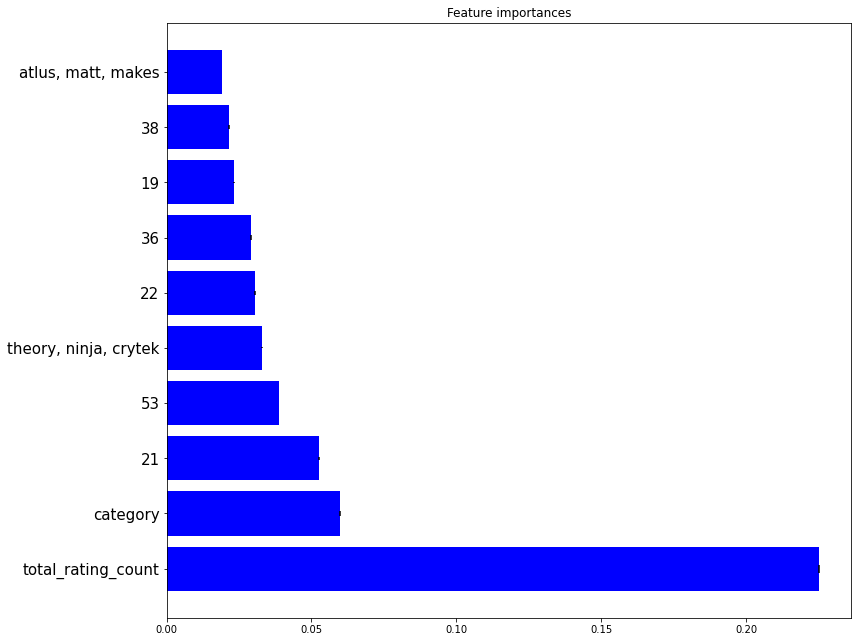

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Feature importances")
n = 10
n_indices = indices[:n]
labels = np.array(feature_names)[n_indices]
plt.barh(range(n), importances[n_indices], color="b", yerr=std[n_indices])
plt.yticks(range(n), labels, size=15)
plt.tight_layout(pad=1)
plt.show()

In [ ]:
np.mean(cross_val_score(regressor, X_enc, y, scoring = mae_scorer, cv=4))

0.7286177322765468

In [ ]:
(2**0.7286177322765468  - 1) *6.39 * 60

251.91323291112064

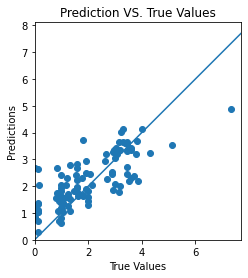

In [ ]:
test_predictions = regressor.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.title("Prediction VS. True Values")
_ = plt.plot([-100, 100], [-100, 100])

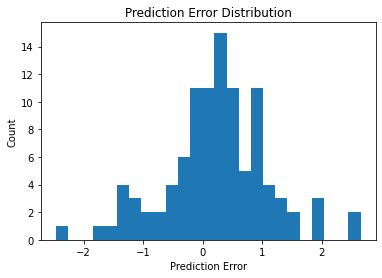

In [ ]:
plt.hist(test_predictions - y_test, bins=25)
plt.title("Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()

# Neural Network

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [ ]:
rslt_df

,publisher,developer,vg_score,critic_score,user_score,total_sales_shipped,category,status,age_ratings,collection,rating,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,franchise,log2,year,month,day,genres 7,genres 13,genres 8,genres 15,genres 34,genres 16,genres 24,genres 2,genres 30,genres 4,genres 5,genres 31,genres 32,genres 9,genres 12,genres 33,genres 10,genres 14,genres 36,genres 25,genres 35,genres 11,genres 26,platforms 7,platforms 63,platforms 163,platforms 165,platforms 13,platforms 21,platforms 8,platforms 42,platforms 385,platforms 49,platforms 34,platforms 15,platforms 24,platforms 170,platforms 16,platforms 6,platforms 23,platforms 39,platforms 5,platforms 74,platforms 94,platforms 121,platforms 130,platforms 52,platforms 159,platforms 72,platforms 32,platforms 82,platforms 9,platforms 12,platforms 18,platforms 29,platforms 86,platforms 37,platforms 386,platforms 20,platforms 93,platforms 132,platforms 3,platforms 58,platforms 48,platforms 73,platforms 384,platforms 19,platforms 46,platforms 14,platforms 44,platforms 38,platforms 41,platforms 64,platforms 55,platforms 25,platforms 113,platforms 240,platforms 35,platforms 167,platforms 169,platforms 137,platforms 11,platforms 26,platforms 161,game_modes,game_modes 4,game_modes 5,game_modes 3,game_modes 1,game_modes 6,game_modes 2,player_perspectives,player_perspectives 7,player_perspectives 4,player_perspectives 5,player_perspectives 3,player_perspectives 1,player_perspectives 6,player_perspectives 2,themes,themes 21,themes 17,themes 42,themes 34,themes 27,themes 23,themes 28,themes 39,themes 43,themes 31,themes 32,themes 18,themes 20,themes 40,themes 33,themes 22,themes 19,themes 44,themes 38,themes 41,themes 1,themes 35,game_engines,game_engines 192,game_engines 265,game_engines 207,game_engines 212,game_engines 91,game_engines 42,game_engines 8,game_engines 17,game_engines 971,game_engines 567,game_engines 610,game_engines 2,game_engines 235,game_engines 89,game_engines 319,game_engines 572,game_engines 487,game_engines 118,game_engines 135,game_engines 970,game_engines 311,game_engines 318,game_engines 684,game_engines 174,game_engines 233,game_engines 29,game_engines 60,game_engines 1115,game_engines 321,game_engines 45,game_engines 3,game_engines 120,game_engines 78,game_engines 677,game_engines 73,game_engines 310,game_engines 820,game_engines 1149,game_engines 84,game_engines 38,game_engines 41,game_engines 334,game_engines 36,game_engines 55,game_engines 404,game_engines 529,game_engines 515,game_engines 278,game_engines 279,game_engines 576,game_engines 1309,game_engines 68,game_engines 95,game_engines 280,game_engines 618,game_engines 291,game_engines 225,game_engines 277,game_engines 6,game_engines 119,game_engines 325,game_engines 761,game_engines 412,game_engines 76,game_engines 326,game_engines 177,game_engines 491,game_engines 768,game_engines 179,game_engines 259,game_engines 528,game_engines 105,game_engines 476,game_engines 234,game_engines 668,game_engines 400,game_engines 48,game_engines 65,game_engines 1011,game_engines 19,game_engines 10,game_engines 1156,game_engines 46,game_engines 14,game_engines 214,game_engines 1036,game_engines 502,game_engines 50,game_engines 240,game_engines 7,game_engines 351,game_engines 63,game_engines 1290,game_engines 760,game_engines 114,game_engines 13,game_engines 1045,game_engines 465,game_engines 296,game_engines 126,game_engines 16,game_engines 149,game_engines 79,game_engines 237,game_engines 1108,game_engines 130,game_engines 347,game_engines 152,game_engines 350,game_engines 437,game_engines 209,game_engines 752,game_engines 9,game_engines 18,game_engines 12,game_engines 490,game_engines 486,game_engines 107,game_engines 454,game_engines 818,game_engines 439,game_engines 354,game_engines 153,game_engines 513,game_engines 87,game_engines 418,game_engines 35,game_engines 341,game_engines 170,game_engines 1266,game_engines 436,game_engines 391,game_engines 21,game

In [ ]:
companies = list(set(rslt_df.publisher.unique()).union(set(rslt_df.developer.unique())))
rslt_df['publisher'].replace(companies, list(range(len(companies))), inplace=True)
rslt_df['developer'].replace(companies, list(range(len(companies))), inplace=True)

In [ ]:
rslt_df

,publisher,developer,vg_score,critic_score,user_score,total_sales_shipped,category,status,age_ratings,collection,rating,total_rating,total_rating_count,hypes,franchises,aggregated_rating,aggregated_rating_count,franchise,log2,year,month,day,genres 7,genres 13,genres 8,genres 15,genres 34,genres 16,genres 24,genres 2,genres 30,genres 4,genres 5,genres 31,genres 32,genres 9,genres 12,genres 33,genres 10,genres 14,genres 36,genres 25,genres 35,genres 11,genres 26,platforms 7,platforms 63,platforms 163,platforms 165,platforms 13,platforms 21,platforms 8,platforms 42,platforms 385,platforms 49,platforms 34,platforms 15,platforms 24,platforms 170,platforms 16,platforms 6,platforms 23,platforms 39,platforms 5,platforms 74,platforms 94,platforms 121,platforms 130,platforms 52,platforms 159,platforms 72,platforms 32,platforms 82,platforms 9,platforms 12,platforms 18,platforms 29,platforms 86,platforms 37,platforms 386,platforms 20,platforms 93,platforms 132,platforms 3,platforms 58,platforms 48,platforms 73,platforms 384,platforms 19,platforms 46,platforms 14,platforms 44,platforms 38,platforms 41,platforms 64,platforms 55,platforms 25,platforms 113,platforms 240,platforms 35,platforms 167,platforms 169,platforms 137,platforms 11,platforms 26,platforms 161,game_modes,game_modes 4,game_modes 5,game_modes 3,game_modes 1,game_modes 6,game_modes 2,player_perspectives,player_perspectives 7,player_perspectives 4,player_perspectives 5,player_perspectives 3,player_perspectives 1,player_perspectives 6,player_perspectives 2,themes,themes 21,themes 17,themes 42,themes 34,themes 27,themes 23,themes 28,themes 39,themes 43,themes 31,themes 32,themes 18,themes 20,themes 40,themes 33,themes 22,themes 19,themes 44,themes 38,themes 41,themes 1,themes 35,game_engines,game_engines 192,game_engines 265,game_engines 207,game_engines 212,game_engines 91,game_engines 42,game_engines 8,game_engines 17,game_engines 971,game_engines 567,game_engines 610,game_engines 2,game_engines 235,game_engines 89,game_engines 319,game_engines 572,game_engines 487,game_engines 118,game_engines 135,game_engines 970,game_engines 311,game_engines 318,game_engines 684,game_engines 174,game_engines 233,game_engines 29,game_engines 60,game_engines 1115,game_engines 321,game_engines 45,game_engines 3,game_engines 120,game_engines 78,game_engines 677,game_engines 73,game_engines 310,game_engines 820,game_engines 1149,game_engines 84,game_engines 38,game_engines 41,game_engines 334,game_engines 36,game_engines 55,game_engines 404,game_engines 529,game_engines 515,game_engines 278,game_engines 279,game_engines 576,game_engines 1309,game_engines 68,game_engines 95,game_engines 280,game_engines 618,game_engines 291,game_engines 225,game_engines 277,game_engines 6,game_engines 119,game_engines 325,game_engines 761,game_engines 412,game_engines 76,game_engines 326,game_engines 177,game_engines 491,game_engines 768,game_engines 179,game_engines 259,game_engines 528,game_engines 105,game_engines 476,game_engines 234,game_engines 668,game_engines 400,game_engines 48,game_engines 65,game_engines 1011,game_engines 19,game_engines 10,game_engines 1156,game_engines 46,game_engines 14,game_engines 214,game_engines 1036,game_engines 502,game_engines 50,game_engines 240,game_engines 7,game_engines 351,game_engines 63,game_engines 1290,game_engines 760,game_engines 114,game_engines 13,game_engines 1045,game_engines 465,game_engines 296,game_engines 126,game_engines 16,game_engines 149,game_engines 79,game_engines 237,game_engines 1108,game_engines 130,game_engines 347,game_engines 152,game_engines 350,game_engines 437,game_engines 209,game_engines 752,game_engines 9,game_engines 18,game_engines 12,game_engines 490,game_engines 486,game_engines 107,game_engines 454,game_engines 818,game_engines 439,game_engines 354,game_engines 153,game_engines 513,game_engines 87,game_engines 418,game_engines 35,game_engines 341,game_engines 170,game_engines 1266,game_engines 436,game_engines 391,game_engines 21,game

In [ ]:
train_dataset = rslt_df.sample(frac=0.8,random_state=0)
test_dataset = rslt_df.drop(train_dataset.index)


In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("log2")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
publisher,324.0,133.774691,92.866970,1.000000,52.000000,113.000000,238.000000,284.000000
developer,324.0,134.043210,80.248712,0.000000,55.750000,134.000000,191.000000,284.000000
vg_score,324.0,0.661111,2.229586,0.000000,0.000000,0.000000,0.000000,9.600000
critic_score,324.0,1.824691,3.447718,0.000000,0.000000,0.000000,0.000000,9.900000
user_score,324.0,0.413889,1.898808,0.000000,0.000000,0.000000,0.000000,10.000000
...,...,...,...,...,...,...,...,...
95,324.0,-0.217694,0.079763,-0.424967,-0.247372,-0.206274,-0.174816,0.011779
96,324.0,-0.308108,0.131063,-0.581270,-0.370461,-0.331248,-0.287599,0.084606
97,324.0,0.063983,0.090466,-0.135544,-0.005184,0.061625,0.136790,0.335038
98,324.0,-0.089150,0.155196,-0.580038,-0.090460,-0.051804,-0.017190,0.271998


In [ ]:
train_labels = train_dataset.pop('log2')
test_labels = test_dataset.pop('log2')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(1)
  ])


  model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001),metrics=['mae', 'mse'])
  return model

In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

251.90542427493077


............................

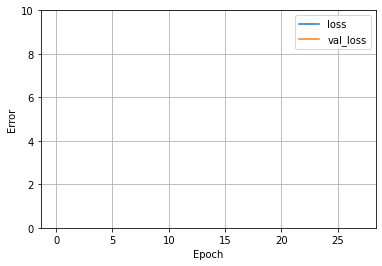

In [ ]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_dataset, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_loss(history)

In [ ]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))

3/3 - 0s - loss: 346.9580 - mae: 12.5382 - mse: 329.1495 - 50ms/epoch - 17ms/step
Testing set Mean Abs Error: 12.54


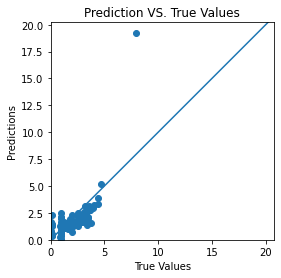

In [ ]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.title("Prediction VS. True Values")
_ = plt.plot([-100, 100], [-100, 100])


# sklearn NN

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
regr = MLPRegressor(hidden_layer_sizes=(1024, 1024, 1024), random_state=1, learning_rate='adaptive', max_iter=10000)

In [ ]:
X = rslt_df.drop(['log2'], axis=1)
y = rslt_df['log2']
X_enc = sup_vec.fit_transform(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
np.mean(cross_val_score(regr, X_enc, y, scoring = mae_scorer, cv=4))

1.1081813891946515